In [6]:
import pandas as pd
import numpy as np

# show all df columns
pd.set_option('display.max_columns', None)

# Helps to reload .py functions when edited
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

# Define scoring metric
def rmse(y_actual, y_predicted):
    return np.sqrt(np.mean(np.square(y_actual - y_predicted)))

In [8]:
train_df = pd.read_pickle("LDA_data/train_df.pkl")
test_df = pd.read_pickle("LDA_data/test_df.pkl")
target_df = pd.read_pickle("LDA_data/target_df.pkl")

In [9]:
train_df.shape, test_df.shape

((175000, 412), (83210, 412))

In [10]:
test_df.head()

,country_Portugal,country_France,country_US,country_Spain,country_Italy,country_Chile,country_Argentina,country_Australia,country_Greece,country_Austria,country_New Zealand,country_South Africa,country_Slovenia,country_Germany,country_Bulgaria,country_Romania,country_Canada,country_Israel,country_Moldova,country_England,country_India,country_Bosnia and Herzegovina,country_Cyprus,country_Croatia,country_Hungary,country_Lithuania,country_Brazil,country_nan,country_Morocco,country_Mexico,country_China,country_Uruguay,country_Turkey,country_Ukraine,country_Lebanon,country_South Korea,country_Georgia,country_Peru,country_Japan,country_Switzerland,country_Macedonia,country_Luxembourg,country_Czech Republic,country_Serbia,country_Slovakia,country_Armenia,designation,points,province,region_1,region_2_nan,region_2_Central Coast,region_2_Columbia Valley,region_2_Sonoma,region_2_Finger Lakes,region_2_Willamette Valley,region_2_Napa-Sonoma,region_2_Napa,region_2_Southern Oregon,region_2_California Other,region_2_Sierra Foothills,region_2_Oregon Other,region_2_Central Valley,region_2_North Coast,region_2_Mendocino/Lake Counties,region_2_Long Island,region_2_Washington Other,region_2_South Coast,region_2_New York Other,taster_name_nan,taster_name_Sean P. Sullivan,taster_name_Michael Schachner,taster_name_Roger Voss,taster_name_Virginie Boone,taster_name_Joe Czerwinski,taster_name_Matt Kettmann,taster_name_Kerin O’Keefe,taster_name_Susan Kostrzewa,taster_name_Anne Krebiehl MW,taster_name_Paul Gregutt,taster_name_Lauren Buzzeo,taster_name_Jim Gordon,taster_name_Anna Lee C. Iijima,taster_name_Alexander Peartree,taster_name_Jeff Jenssen,taster_name_Mike DeSimone,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_twitter_handle_nan,taster_twitter_handle_@wawinereport,taster_twitter_handle_@wineschach,taster_twitter_handle_@vossroger,taster_twitter_handle_@vboone,taster_twitter_handle_@JoeCz,taster_twitter_handle_@mattkettmann,taster_twitter_handle_@kerinokeefe,taster_twitter_handle_@suskostrzewa,taster_twitter_handle_@AnneInVino,taster_twitter_handle_@paulgwine,taster_twitter_handle_@laurbuzz,taster_twitter_handle_@gordone_cellars,taster_twitter_handle_@worldwineguys,taster_twitter_handle_@bkfiona,taster_twitter_handle_@winewchristina,title,variety_col,winery_col,ratings,has_twit_handle,title_year_nan,title_year_2010.0,title_year_2016.0,title_year_2014.0,title_year_2013.0,title_year_2005.0,title_year_2011.0,title_year_2015.0,title_year_2007.0,title_year_2009.0,title_year_2012.0,title_year_2004.0,title_year_1995.0,title_year_2008.0,title_year_2006.0,title_year_2003.0,title_year_2000.0,title_year_2001.0,title_year_1997.0,title_year_1998.0,title_year_1852.0,title_year_1999.0,title_year_2002.0,title_year_1996.0,title_year_1992.0,title_year_1990.0,title_year_1875.0,title_year_1994.0,title_year_1492.0,title_year_1986.0,title_year_1150.0,title_year_1877.0,title_year_1847.0,title_year_1983.0,title_year_1991.0,title_year_1898.0,title_year_7200.0,title_year_1988.0,title_year_1872.0,title_year_1965.0,title_year_1850.0,title_year_2017.0,title_year_1860.0,title_year_1927.0,title_year_1821.0,title_year_1989.0,title_year_1868.0,title_year_1957.0,title_year_1978.0,title_year_1904.0,title_year_1976.0,title_year_1882.0,title_year_1987.0,title_year_1969.0,title_year_1929.0,title_year_1967.0,title_year_1980.0,title_year_1993.0,title_year_1621.0,title_year_1845.0,title_year_1961.0,title_year_1848.0,title_year_1945.0,title_year_1952.0,title_year_1070.0,title_year_1870.0,title_year_1637.0,title_year_1856.0,title_year_1985.0,title_year_1607.0,title_year_1963.0,title_year_1968.0,title_year_1934.0,title_year_1789.0,title_year_1984.0,title_year_1947.0,title_year_1973.0,title_year_3000.0,title_year_1919.0,title_year_1982.0,n_words,n_char,acidity,age,aging,alcohol,almost,along,alongside,also,apple,apricot,aromas,attractive,baked,balance,balanced,barrel,berry,best,big,bit,bitter,black,blackberries,blackberry,blanc,blend,bodied,bottle,bright

In [11]:
X = train_df.copy()
test_X = test_df.copy()
y = target_df.copy()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Import libraries:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV #Perforing grid search
from sklearn import metrics   #metrics

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

SEED = 27
#X = train_df.copy()
#X_test = test_df.copy()
#y = target_df
predictors = train_df.columns

In [24]:
def modelfit(alg, predictors, X_train=X, y_train=y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print("n_estimators: ", cvresult.shape[0])
    # Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='rmse')

    # Predict training set:
    Xtrain_predictions = alg.predict(X_train)
    
    # Print model report:
    print("\nModel Report")
    print("R2 Score : %.4g" % metrics.r2_score(
                                                y_train.values, Xtrain_predictions))
    rmse = np.sqrt(np.mean(np.square(np.exp(y_train) - np.exp(Xtrain_predictions))))
    #rmse = rmse(y_train, Xtrain_predictions)
    print("RMSE Score (Train): %f" % rmse)
    
    print(cvresult.tail())
    
    xgb.plot_importance(alg, max_num_features=20, height=0.8)

### Base Model

n_estimators:  144


/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
R2 Score : 0.8039
RMSE Score (Train): inf
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
139        16.816324        0.249874       25.019274       2.773027
140        16.796789        0.244079       25.011546       2.771266
141        16.772519        0.245585       25.004287       2.772035
142        16.742674        0.251636       24.995823       2.768627
143        16.720365        0.258746       24.994160       2.769339


/home/aims/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


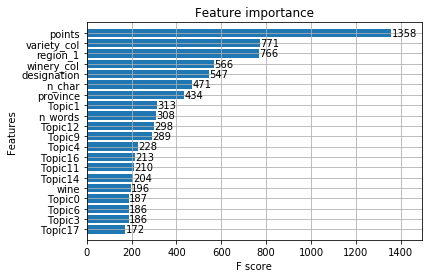

In [25]:
xgb0 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=144,
    max_depth=9,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric= 'rmse',
    n_jobs=-1,
    scale_pos_weight=1,
    silent=True,
    seed=SEED)
modelfit(xgb0, predictors=predictors)

In [36]:
xgb0 = XGBRegressor(
    learning_rate=0.2,
    n_estimators=144,
    max_depth=9,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric= 'rmse',
    n_jobs=-1,
    scale_pos_weight=1,
    silent=True,
    seed=SEED)
xgb0.fit(X, y, eval_metric="rmse", early_stopping_rounds=10, eval_set=eval_set, verbose=True)

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:41.7982
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:36.3697
[2]	validation_0-rmse:32.2341
[3]	validation_0-rmse:29.1059
[4]	validation_0-rmse:27.0021
[5]	validation_0-rmse:25.3596
[6]	validation_0-rmse:24.0436
[7]	validation_0-rmse:22.9872
[8]	validation_0-rmse:22.1027
[9]	validation_0-rmse:21.5936
[10]	validation_0-rmse:21.2041
[11]	validation_0-rmse:20.8507
[12]	validation_0-rmse:20.5788
[13]	validation_0-rmse:20.3483
[14]	validation_0-rmse:20.046
[15]	validation_0-rmse:19.8444
[16]	validation_0-rmse:19.6862
[17]	validation_0-rmse:19.5879
[18]	validation_0-rmse:19.3597
[19]	validation_0-rmse:19.2093
[20]	validation_0-rmse:19.0594
[21]	validation_0-rmse:18.9736
[22]	validation_0-rmse:18.9021
[23]	validation_0-rmse:18.787
[24]	validation_0-rmse:18.6992
[25]	validation_0-rmse:18.616
[26]	validation_0-rmse:18.4993
[27]	validation_0-rmse:18.3896
[28]	validation_0-rmse:18.3128
[29]	validation_0-rmse:18.2329
[30]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, early_stopping_rounds=10,
       eval_metric='rmse', gamma=0, importance_type='gain',
       learning_rate=0.2, max_delta_step=0, max_depth=9,
       min_child_weight=3, missing=None, n_estimators=144, n_jobs=-1,
       nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8, verbosity=1)

In [ ]:
n_folds = 5
early_stopping = 10
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3],
              'eval_metric':'rmse',
              'nthread':4
             }

#params = {'eta': 0.02, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:squarederror', 'seed': 99, 'silent': 1, 'eval_metric':'rmse', 'nthread':4}

xg_train = xgb.DMatrix(X, label=y);

cv = xgb.cv(params, xg_train, 5000, nfold=n_folds, early_stopping_rounds=early_stopping, verbose_eval=1)

In [18]:
import sklearn

In [19]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [31]:
xgb0 = XGBRegressor(
    learning_rate=0.2,
    n_estimators=72,
    max_depth=9,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    n_jobs=-1,
    scale_pos_weight=1,
    silent=True,
    seed=SEED)
eval_set = [(X_val, y_val)]
xgb0.fit(X_train, y_train, eval_metric="rmse", early_stopping_rounds=5, eval_set=eval_set, verbose=True)

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:41.9193
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:36.5342
[2]	validation_0-rmse:32.557
[3]	validation_0-rmse:29.4825
[4]	validation_0-rmse:27.6916
[5]	validation_0-rmse:26.168
[6]	validation_0-rmse:25.0264
[7]	validation_0-rmse:23.7061
[8]	validation_0-rmse:22.7703
[9]	validation_0-rmse:22.0333
[10]	validation_0-rmse:21.5425
[11]	validation_0-rmse:21.0785
[12]	validation_0-rmse:20.6875
[13]	validation_0-rmse:20.3958
[14]	validation_0-rmse:20.1815
[15]	validation_0-rmse:19.9402
[16]	validation_0-rmse:19.761
[17]	validation_0-rmse:19.6288
[18]	validation_0-rmse:19.5486
[19]	validation_0-rmse:19.4029
[20]	validation_0-rmse:19.2959
[21]	validation_0-rmse:19.1747
[22]	validation_0-rmse:19.0553
[23]	validation_0-rmse:18.964
[24]	validation_0-rmse:18.8711
[25]	validation_0-rmse:18.818
[26]	validation_0-rmse:18.7519
[27]	validation_0-rmse:18.652
[28]	validation_0-rmse:18.6133
[29]	validation_0-rmse:18.5601
[30]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=72,
       n_jobs=-1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8, verbosity=1)

In [28]:
def grid_details(grid_search):
    grid_search.fit(X,y)
    print(f'Best Params: {np.sqrt(-1*grid_search.best_score_)}, {grid_search.best_params_}\n'
          )
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)

In [29]:
param_test1 = {
    'max_depth': range(2, 10, 1),
    'min_child_weight': range(1, 6, 2),
    
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.2, n_estimators=72, max_depth=5,
                                               min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                               objective='reg:linear', nthread=4, scale_pos_weight=1, seed=SEED),
                        param_grid=param_test1, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5)

grid_details(gsearch1)

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: 0.06626727518647207, {'max_depth': 9, 'min_child_weight': 3}

0.08054509981204175 {'max_depth': 2, 'min_child_weight': 1}
0.08054509981204175 {'max_depth': 2, 'min_child_weight': 3}
0.08054447710957764 {'max_depth': 2, 'min_child_weight': 5}
0.07674372314524079 {'max_depth': 3, 'min_child_weight': 1}
0.07663699612734251 {'max_depth': 3, 'min_child_weight': 3}
0.07675724856536767 {'max_depth': 3, 'min_child_weight': 5}
0.07387684984081784 {'max_depth': 4, 'min_child_weight': 1}
0.07375342888613233 {'max_depth': 4, 'min_child_weight': 3}
0.07378919308114013 {'max_depth': 4, 'min_child_weight': 5}
0.07166254747867624 {'max_depth': 5, 'min_child_weight': 1}
0.0716384680095985 {'max_depth': 5, 'min_child_weight': 3}
0.07169687592159667 {'max_depth': 5, 'min_child_weight': 5}
0.06992368910796924 {'max_depth': 6, 'min_child_weight': 1}
0.06993502809983874

Tune gamma

In [45]:
ens = pd.read_csv("subm/submission_ens.csv")
nn = pd.read_csv("subm/submission_nn.csv")
rf = pd.read_csv("subm/submission_rf1.csv")
xgb = pd.read_csv("subm/submission_xgb1.csv")

In [57]:
subm = 0.7*xgb + 0.15*rf + 0.15*nn

In [58]:
test_label =subm['price']

In [ ]:
### Submision

In [37]:
test_label = xgb0.predict(test_X, ntree_limit=xgb0.best_iteration)

In [59]:
test_label.values

array([79.57495276, 38.44366662, 55.0164503 , ..., 39.62406539,
       25.79622008, 50.28533152])

In [60]:
# Submissions to kaggle
from submission1 import submit
submit(test_label.values, test_df)

Fist 10 predictions: [79.57495276 38.44366662 55.0164503  29.41801164 11.30764379 17.28916437
 11.14534277 11.07769864 13.30753708 49.79191235]

Save path : submissions/submission_xgb_ens3.csv
